In [111]:

class Layer_w_tanh:
    def __init__(self,wFactor):
        self.response = np.tanh
        self.adapt={  
            'habituateAT':7,     # by nature
            'enhanceAT':2       # by nature
        }
        self.adaptFactor=0.1   # by nature
        self.threshold = 1 # changes, not up-bounded. such a weird thing to have.... changes based on enviroment... like ion concentraction
        self.wFactor=np.array(wFactor)
        self.wDict={}
        self.charge={}
        self.discharge={}
    def adaptW(self,i,Xi): 
        if Xi>=self.adapt['habituateAT']:
            self.wDict[i] = np.array(self.wDict[i]) - self.adaptFactor  #  need to refine it.. self.eta * error * x or something like that...
        elif Xi>=self.adapt['enhanceAT']:
            self.wDict[i] = np.array(self.wDict[i]) + self.adaptFactor
        else:
            print i, " weight not changed"
    def x2w(self,X):
        for i, wFactor in enumerate(self.wFactor):
            if X[i]>self.adapt['habituateAT']:
                X[i]=self.adapt['habituateAT']
            self.wDict[i]=[wFactor]*X[i].round(0)   # extend each list only, not changing value
    def chargeBY(self,X):
        for i, neuron in self.wDict.iteritems():
            self.charge[i] = np.array(neuron)*X[i]
            self.adaptW(i,X[i])
#             print i,np.array(neuron)*X[i]
    def responseTO(self,X):
        for i, charge in self.charge.iteritems():
#             print i, self.response(charge-self.threshold)
            self.discharge[i]=self.response(charge-self.threshold)
#         print self.discharge
    def stimulateBY(self,X):
        self.x2w(X)
        print "self.wDict",self.wDict
        self.chargeBY(X)
        self.responseTO(X)

wFactor=[0.9,0.9,0.7] # 0<=w<=1, load from file, none random.
group1 = Layer_w_tanh(wFactor)
X= np.array([8,1.5,1.5])
group1.stimulateBY(X)

self.wDict {0: [0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002], 1: [0.90000000000000002, 0.90000000000000002], 2: [0.69999999999999996, 0.69999999999999996]}
1  weight not changed
2  weight not changed


In [99]:
print "group1.wDict",group1.wDict

group1.wDict {0: [0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002, 0.90000000000000002], 1: [0.90000000000000002, 0.90000000000000002], 2: [0.69999999999999996, 0.69999999999999996]}


In [118]:
a=np.array([[9,9,9,0,0,0],[0,9]])
b=a[1]*2
d={}
d[0]=b
print a,b,d

[[9, 9, 9, 0, 0, 0] [0, 9]] [0, 9, 0, 9] {0: [0, 9, 0, 9]}


In [4]:
a=np.array([[9,9,9,0,0,0],[0,9]])
print a
print ([9,9,9,0,0,0],[0])
dic = {0:[9,9,9,0,0,0],
      1:[9,9,9,0,0,0],
      2:[9,9,9,0,0,0,9]
      }
print dic[1], dic.get(0)
dic[3]=[3,4,5]
print dic
print [1]*5
# listT = [(0,4),(1,5)]
# print listT[0]
print "==="
print np.array([0.3]*3)
# print np.array([0.3]*3)


wFactor=np.array([0.3,0.2,0.1])
dic={}
# for i,k in enumerate(wFactor):
#     dic[i]=k
#     print k
# print dic
# dic = dict(enumerate(wFactor))
# print dic

[[9, 9, 9, 0, 0, 0] [0, 9]]
([9, 9, 9, 0, 0, 0], [0])
[9, 9, 9, 0, 0, 0] [9, 9, 9, 0, 0, 0]
{0: [9, 9, 9, 0, 0, 0], 1: [9, 9, 9, 0, 0, 0], 2: [9, 9, 9, 0, 0, 0, 9], 3: [3, 4, 5]}
[1, 1, 1, 1, 1]
===
[ 0.3  0.3  0.3]
0.3
0.2
0.1
{0: 0.29999999999999999, 1: 0.20000000000000001, 2: 0.10000000000000001}


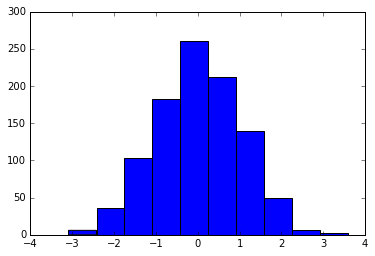

In [125]:
import matplotlib.pyplot as plt
%matplotlib inline
from numpy.random import normal
gaussian_numbers = normal(size=1000)
plt.hist(gaussian_numbers)
plt.show()


z_scores_np = (x_np - x_np.mean()) / x_np.std()


In [134]:
x = [1,4,5,6,6,2,3]
x_np = np.array(x)
print x_np.mean()
print x_np.std()
z_scores_np = (x_np - x_np.mean()) / x_np.std()
print z_scores_np
np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())

3.85714285714
1.80701580581
[-1.58113883  0.07905694  0.63245553  1.18585412  1.18585412 -1.02774024
 -0.47434165]
[0 0 0 1 1 0 0]
